# Breast Cancer Prediction


Name : Rahul Satheesan Nair

Phase 1: Golden Task
    
Project Name : Breast Cancer Prediction


# Problem Statement :
The objective of this project is to create a predictive model that can accurately classify breast
cancer cases as benign or malignant based on a set of relevant features. By leveraging
historical data and applying machine learning techniques, we aim to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer.

# Solution Approach :
1. Data Collection: Gather a dataset that contains relevant features and labels for breast cancer cases. This dataset should include information about patients and the characteristics of their tumors. Common sources for such data include the UCI Machine Learning Repository or medical institutions that provide anonymized patient data.

2. Data Preprocessing: Prepare the data for machine learning by cleaning and transforming it. This involves handling missing values, encoding categorical variables, and scaling or normalizing numerical features. Ensure that the data is in a format suitable for training and testing a machine learning model.

3. Exploratory Data Analysis (EDA): Perform EDA to understand the data and its characteristics. Explore the relationships between features and the target variable (benign or malignant). Visualization can be a valuable tool for gaining insights from the data.

4. Feature Selection: Determine which features are most relevant for classification. You can use techniques like feature importance, correlation analysis, or domain knowledge to select the most informative features.

5. Splitting the Data: Divide the dataset into a training set and a testing set. The training set will be used to train the machine learning model, while the testing set will be used to evaluate its performance.

6. Model Selection: Choose an appropriate machine learning algorithm for binary classification. Common choices for this task include logistic regression, decision trees, random forests, support vector machines (SVM), and neural networks. Experiment with different models to find the one that performs best for your dataset.This project we use more model selection for best accuracy in this data set

7. Model Training: Train the selected model on the training data. You may need to fine-tune hyperparameters to optimize the model's performance.

8. Model Evaluation: Evaluate the model's performance on the testing data using appropriate metrics. Common evaluation metrics for binary classification include accuracy, precision, recall, F1 score, and ROC-AUC.

# Dataset and Cancer knowledge :

1. Fine needle aspiration a type of biopsy procedure. In fine needle aspiration, a thin needle is
inserted into an area of abnormal-appearing tissue or body fluid. As with other types of
biopsies, the sample collected during fine needle aspiration can help make a diagnosis or rule
out conditions such as cancer.

2. Using this process to find the dataset features like radius mean ,texture mean ,area mean etc..

3. Using this data we find the tumor wheather tumor is Benign or Malignant tumor

4. Bengin tumor is non cancerous tumor

5. Malignant tumor is cancerous tumor 

6. We want to find the tumor using features

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Read Dataset

In [4]:
dataset = pd.read_csv("data.csv") 

In [5]:
dataset 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# EDA

In [6]:
dataset.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
dataset.shape 


(569, 32)

In [8]:
dataset.info 

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [9]:
dataset.dtypes 

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
dataset.isnull().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
dataset["diagnosis"].unique() 

array(['M', 'B'], dtype=object)

In [12]:
dataset["diagnosis"].value_counts() 

B    357
M    212
Name: diagnosis, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

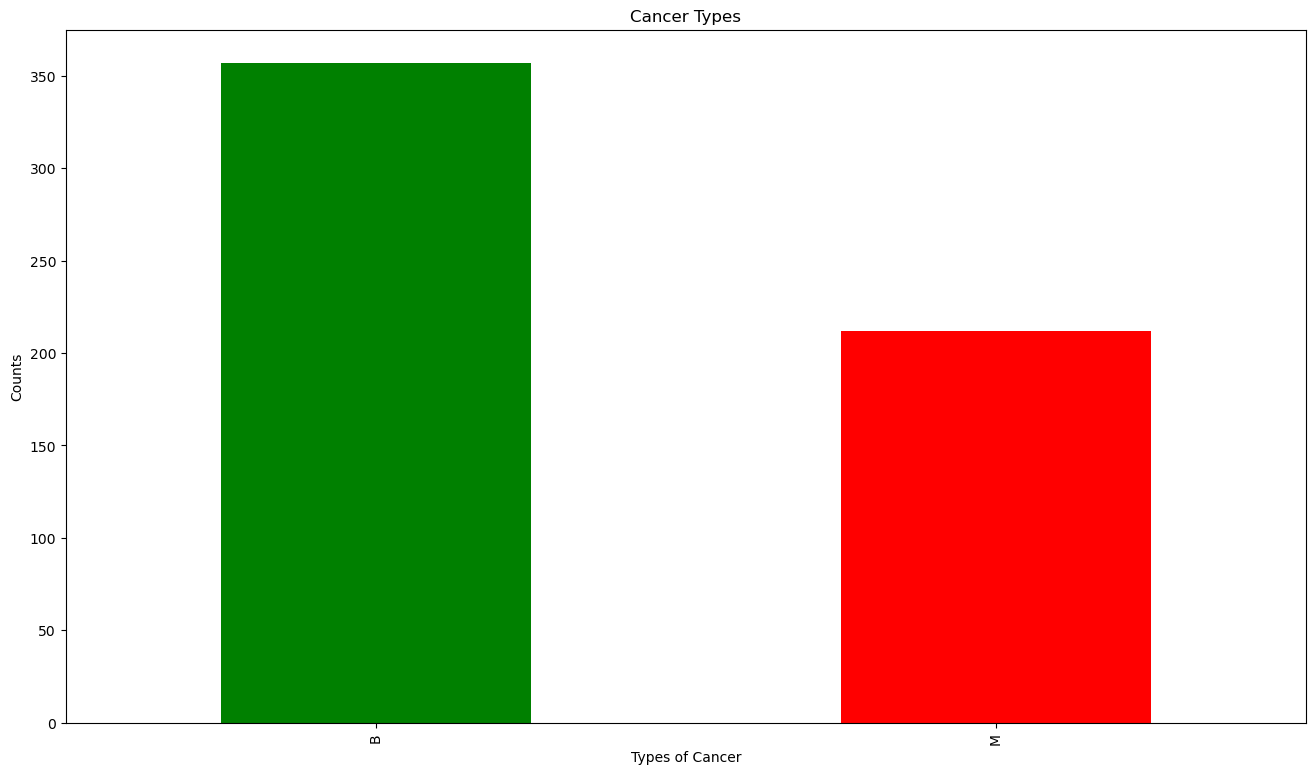

In [13]:


value_count=dataset["diagnosis"].value_counts()  
plt.figure(figsize=(16,9))
value_count.plot(kind="bar",color=["green","red"])
plt.title("Cancer Types")
plt.xlabel("Types of Cancer")
plt.ylabel("Counts")
plt.show


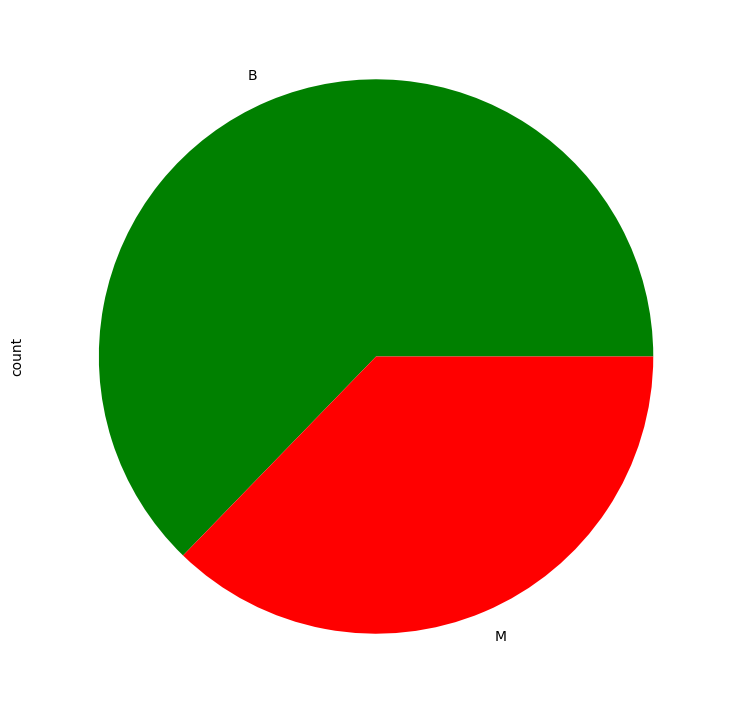

Number of Benign : 357
Number of Benign : 212


In [12]:
plt.figure(figsize=(16,9))
value_count.plot(kind="pie",colors=["green","red"]) 
plt.show()
B,M= value_count
print(f"Number of Benign : {B}")
print(f"Number of Benign : {M}")

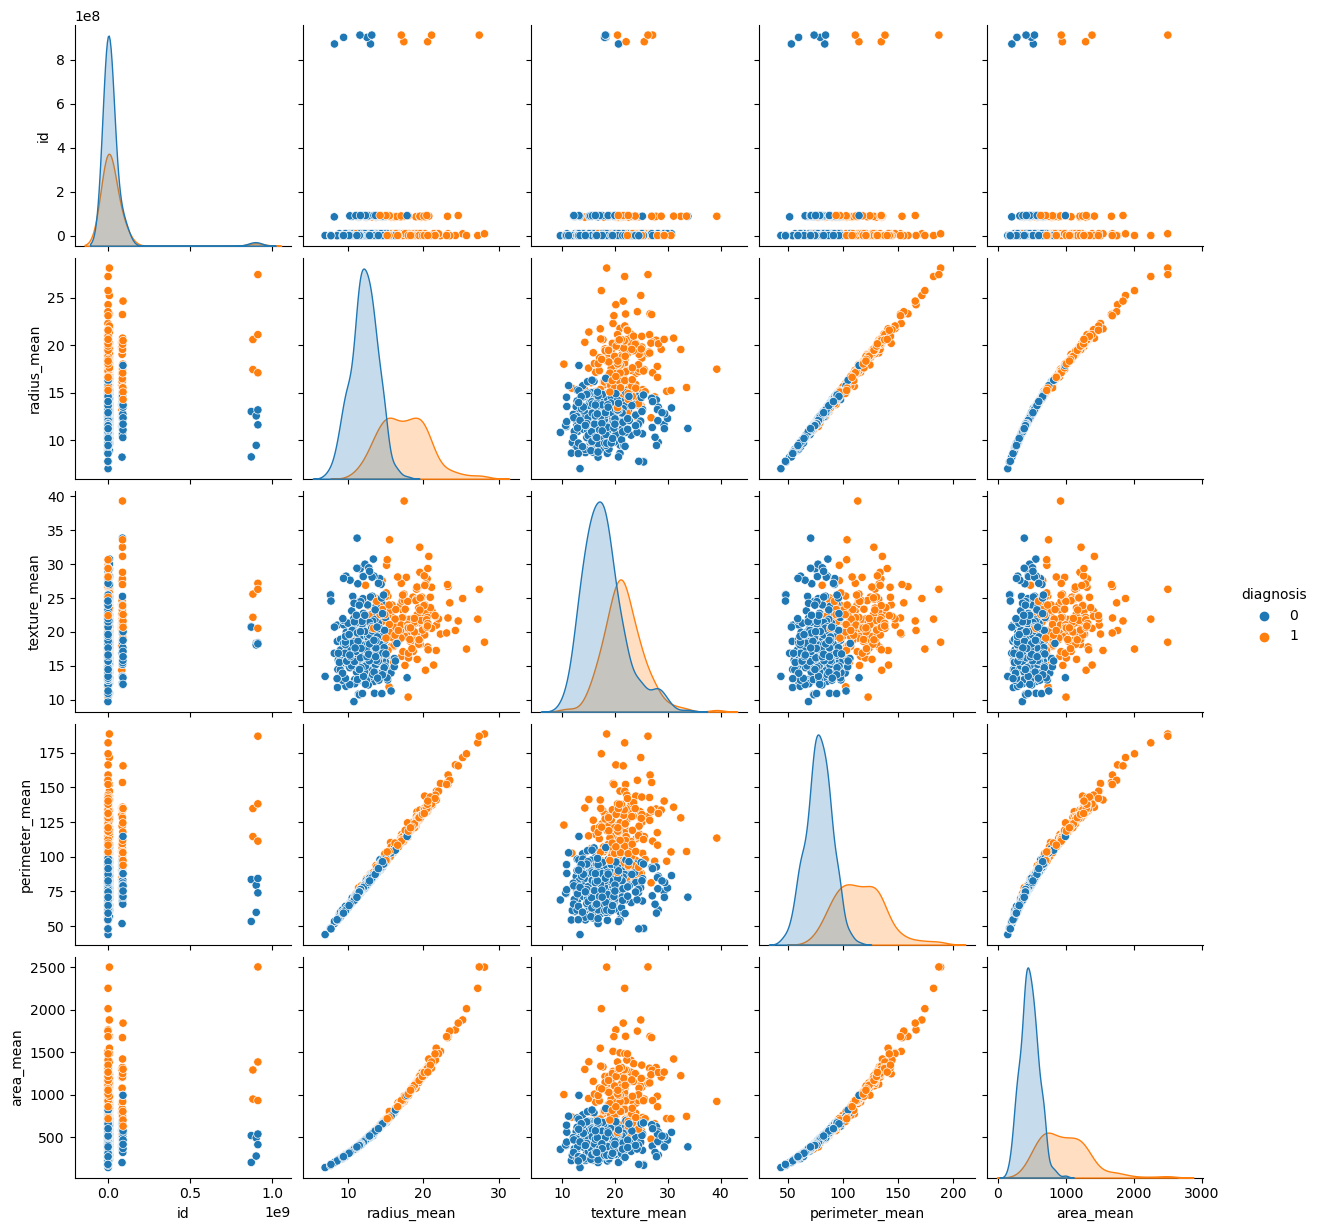

In [45]:
sns.pairplot(dataset.iloc[:,0:6],hue="diagnosis")  

In [17]:
dataset.iloc[:,0:6] 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,842302,M,17.99,10.38,122.80,1001.0
1,842517,M,20.57,17.77,132.90,1326.0
2,84300903,M,19.69,21.25,130.00,1203.0
3,84348301,M,11.42,20.38,77.58,386.1
4,84358402,M,20.29,14.34,135.10,1297.0
...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0
565,926682,M,20.13,28.25,131.20,1261.0
566,926954,M,16.60,28.08,108.30,858.1
567,927241,M,20.60,29.33,140.10,1265.0


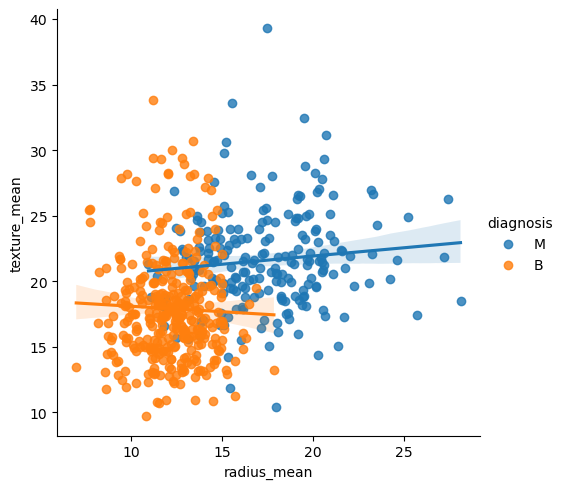

In [18]:
sns.lmplot(x="radius_mean",y="texture_mean",data=dataset,hue="diagnosis") 

In [22]:
dataset['diagnosis']=dataset['diagnosis'].replace(['M', 'B'],[1,0])  

In [23]:
dataset["diagnosis"] 

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

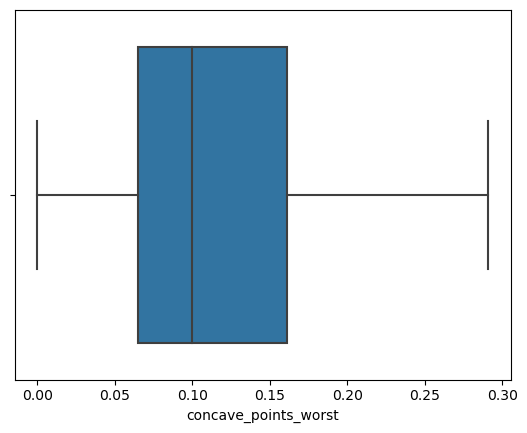

In [24]:
sns.boxplot(dataset["concave_points_worst"]) 
plt.show()


# Feature Selection

In [25]:
cm=dataset.corr().abs()
cm.style.background_gradient(cmap="coolwarm")   

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,0.012968,0.000096,0.050080,0.044158,0.022114,0.052511,0.143048,0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,0.002968,0.023203,0.035174,0.044224,0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.012968,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<AxesSubplot:>

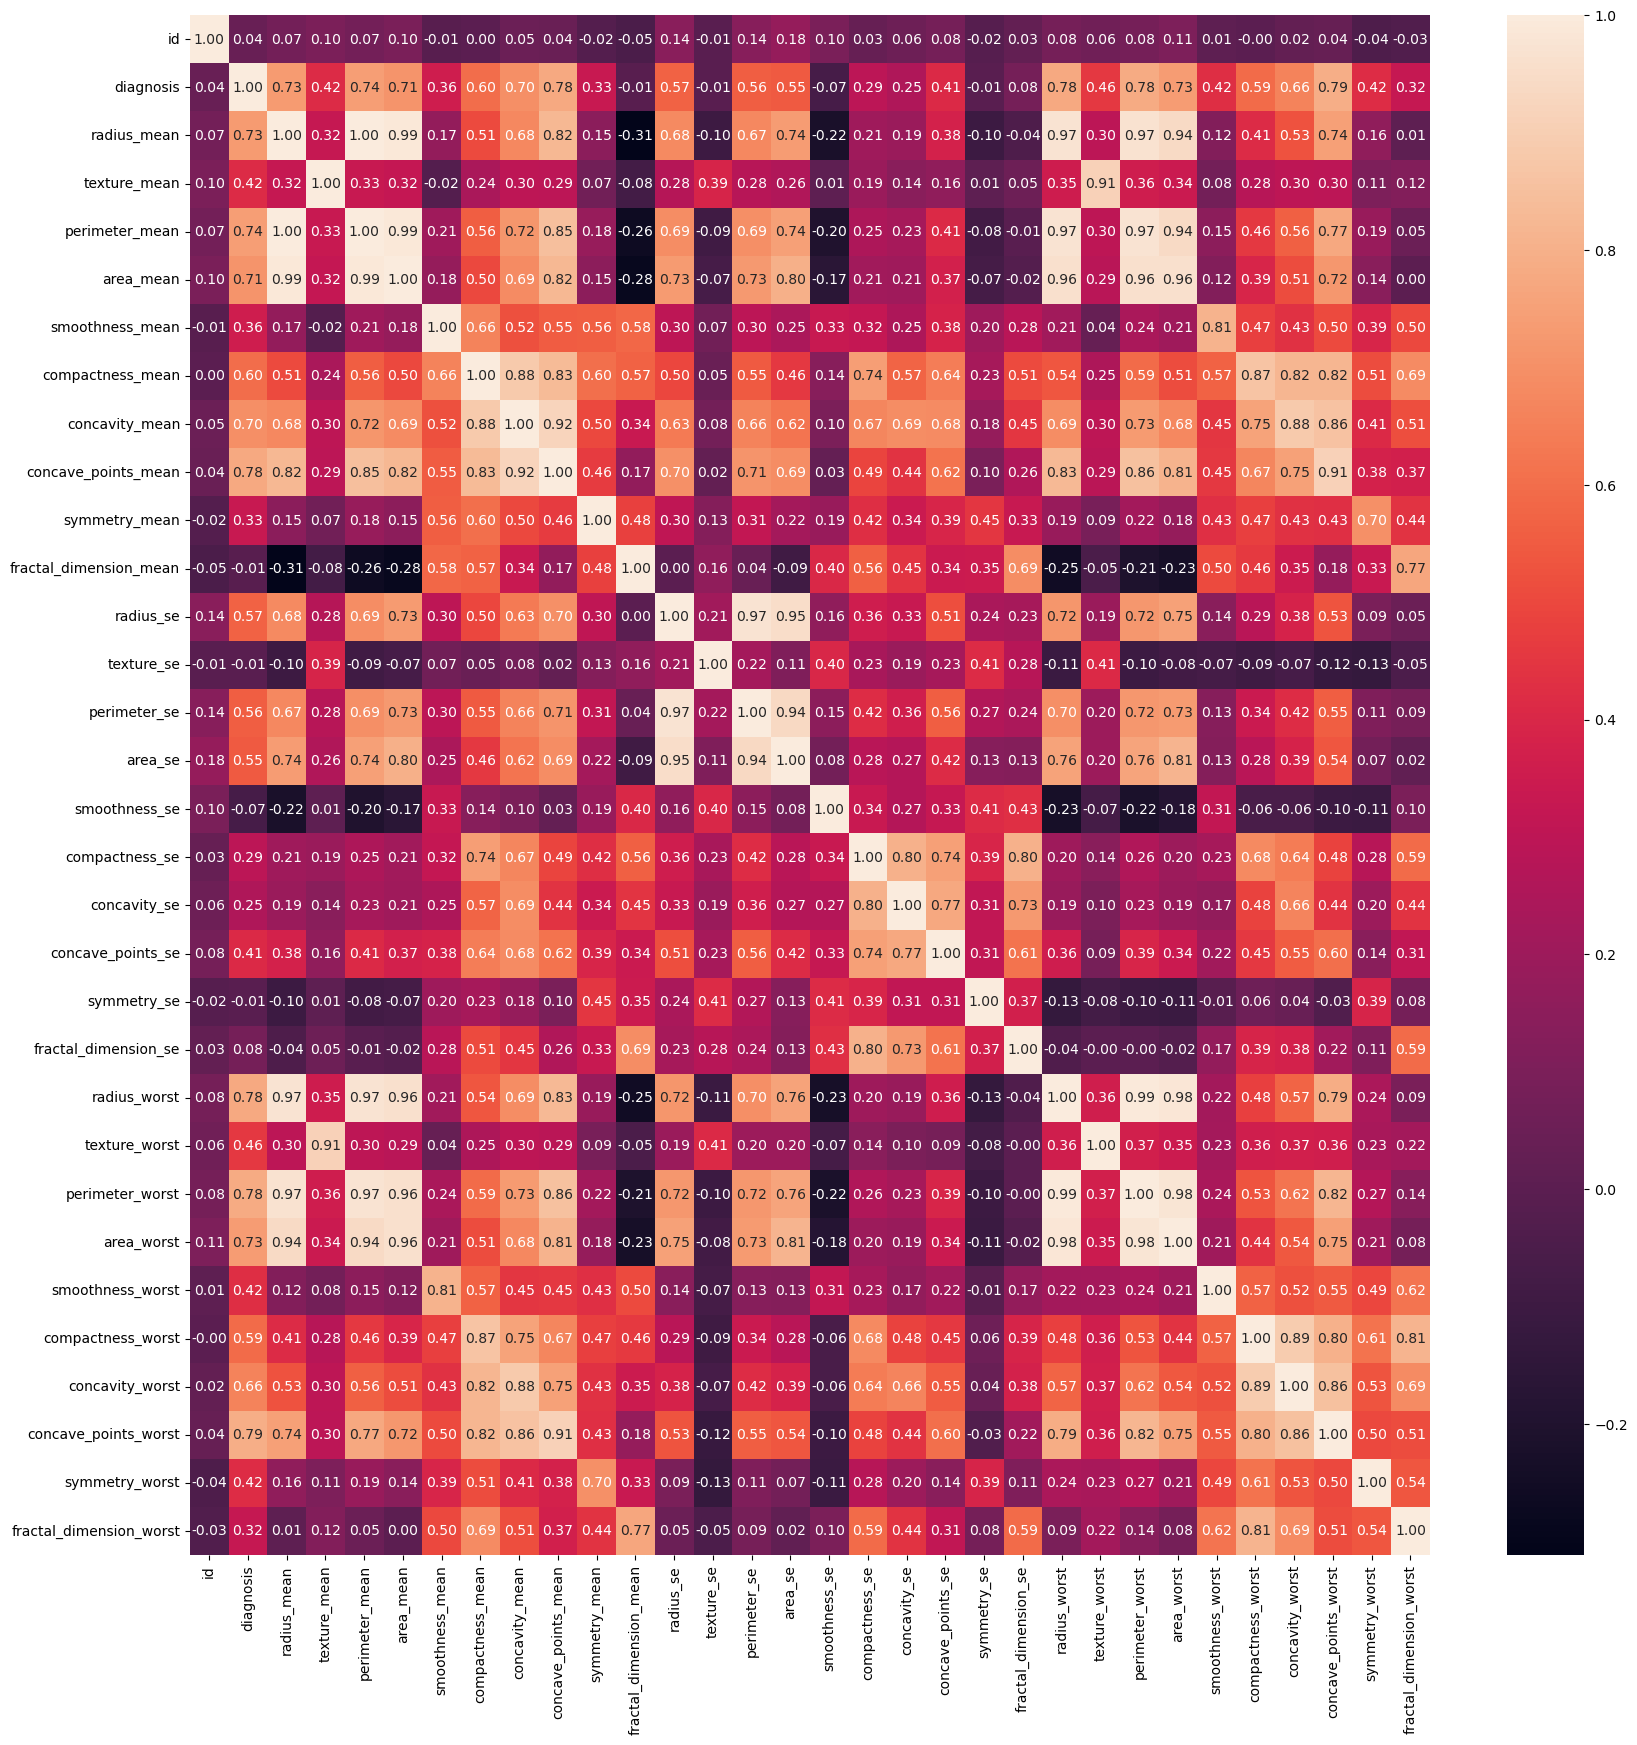

In [26]:
plt.subplots(figsize=(20,20)) 
sns.heatmap(dataset.corr(),annot=True,fmt=".2f")

In [28]:
dataset.corrwith(dataset["diagnosis"]).abs().sort_values() 


symmetry_se                0.006522
texture_se                 0.008303
fractal_dimension_mean     0.012838
id                         0.039769
smoothness_se              0.067016
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave_points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

In [29]:
remove_cols=["symmetry_se","texture_se","fractal_dimension_mean","id","smoothness_se","fractal_dimension_se"]  
hig_corr=dataset.drop(remove_cols,axis=1)
hig_corr.shape 

(569, 26)

In [30]:
x=hig_corr.drop("diagnosis",axis=1) 
x.shape 

(569, 25)

In [31]:
y=dataset["diagnosis"] 
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Scaling or normalizing numerical features


In [32]:
scaler= StandardScaler() 
x=scaler.fit_transform(x)

In [33]:
x 

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Split train and test data

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12) 

# Model selection


In [35]:

knn=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knn.fit(x_train,y_train)

y_predKnn=knn.predict(x_test)

# Cross Validation 
This is an important step of evaluation of our model, in fact we can find how our models can perform on new data. We will use a k-fold cross validation to detect overfitting, ie, failing to generalize a pattern.

In [36]:
 
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
sKnn = cross_validate(estimator=knn,X= x, y=y, scoring=scoring, cv=20)

knn_fit_time = sKnn['fit_time'].mean()
knn_score_time = sKnn['score_time'].mean()
knn_accuracy = sKnn['test_accuracy'].mean()
knn_precision = sKnn['test_precision_macro'].mean()
knn_recall = sKnn['test_recall_macro'].mean()
knn_f1 = sKnn['test_f1_weighted'].mean()
knn_roc = sKnn['test_roc_auc'].mean()

In [37]:
y_predKnn.shape 

(114,)

In [38]:
x_test.shape 

(114, 25)

In [39]:
accKnn=accuracy_score(y_test,y_predKnn) 
accKnn

0.956140350877193

In [40]:
jaccard_score(y_test,y_predKnn) 

0.8958333333333334

# Model Evaluation

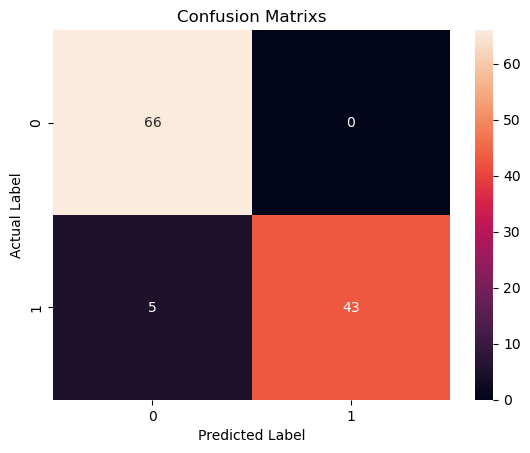

In [41]:

cm=confusion_matrix(y_test,y_predKnn)
sns.heatmap(pd.DataFrame(cm),fmt="g",annot=True)
plt.title("Confusion Matrixs")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [42]:
pd.DataFrame(y_predKnn).value_counts() 

0    71
1    43
dtype: int64

In [43]:
y_test.value_counts()

0    66
1    48
Name: diagnosis, dtype: int64

# Result

In [44]:
print(f"knn_fit_time:{knn_fit_time}","\n") 
print(f"knn_score_time :{knn_score_time}","\n")
print(f"knn_accuracy:{knn_accuracy}","\n")
print(f"knn_precision:{knn_precision}","\n")
print(f"knn_recall:{knn_recall}","\n")
print(f"knn_f1:{knn_f1}","\n")
print(f"knn_roc:{knn_roc}","\n")
print("With the help of cross-validation, the model worked more accurately")

knn_fit_time:0.001330864429473877 

knn_score_time :0.03440138101577759 

knn_accuracy:0.9701354679802956 

knn_precision:0.9739219651177855 

knn_recall:0.963989898989899 

knn_f1:0.9698348221274916 

knn_roc:0.9833184789067143 

With the help of cross-validation, the model worked more accurately


# Conclusion
In conclusion, the K-Nearest Neighbors (KNN) model and using cross validation offers a accuracy , precision_macro, recall_macro , f1_weighted, roc_auc for classifying breast cancer cases. Further refinements and additional data may be considered to enhance the model's predictive capabilities for assisting medical professionals in diagnosing breast cancer.